## **Display the first few rows of each dataframe to understand the structure**

In [1]:
import pandas as pd

# Load all the uploaded CSV files
file_paths = {
    'deliveries_data': '/content/deliveries_data.csv',
    'food_delivery_weather_data': '/content/food_delivery_weather_data.csv',
    'food_delivery_weather_data_with_time': '/content/food_delivery_weather_data_with_time.csv',
    'toronto_food_delivery_2021_2023': '/content/toronto_food_delivery_2021_2023.csv',
    'toronto_food_delivery_2021_2023_with_counts': '/content/toronto_food_delivery_2021_2023_with_counts.csv',
    'toronto_weather_2021_2022': '/content/toronto_weather_2021_2022.csv',
    'toronto_weather_2021_2022_with_location': '/content/toronto_weather_2021_2022_with_location.csv',
    'weather_data': '/content/weather_data.csv'
}

# Load the CSV files
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display the first few rows of each dataframe to understand the structure
dfs_overview = {name: df.head() for name, df in dfs.items()}
dfs_overview


{'deliveries_data':          Date _Time Restaurant Name  Food Category  Delivery Fee (CAD)  \
 0  2021-01-01 18:26       McDonalds  Mediterranean            4.099880   
 1   2021-01-02 0:55       McDonalds  Mediterranean            6.649724   
 2  2021-01-03 17:25     Burger King          Vegan            7.745344   
 3   2021-01-04 9:39     Burger King         Indian            2.995375   
 4   2021-01-05 3:04       Taco Bell        Italian            6.796778   
 
    Total Cost (CAD)  Delivery Time (Minutes)  Customer Rating Payment Method  \
 0         35.247802                52.985054         4.526698     Debit Card   
 1         48.037354                44.334002         2.578640      Gift Card   
 2         52.714623                37.774088         3.746297     Debit Card   
 3         90.761685                57.759836         2.666369         PayPal   
 4         49.963075                21.913553         3.594108     Debit Card   
 
    Delivery Count Location  
 0         

## **Analytics type of each attribute**

In [2]:
# Check for missing values in the datasets before merging
missing_values = {name: df.isnull().sum() for name, df in dfs.items()}

missing_values


{'deliveries_data': Date _Time                 0
 Restaurant Name            0
 Food Category              0
 Delivery Fee (CAD)         0
 Total Cost (CAD)           0
 Delivery Time (Minutes)    0
 Customer Rating            0
 Payment Method             0
 Delivery Count             0
 Location                   0
 dtype: int64,
 'food_delivery_weather_data': Date                 0
 Temperature_C        0
 Precipitation_mm     0
 WindSpeed_kmh        0
 Weather_Condition    0
 Delivery_Orders      0
 dtype: int64,
 'food_delivery_weather_data_with_time': Date                 0
 Temperature_C        0
 Precipitation_mm     0
 WindSpeed_kmh        0
 Weather_Condition    0
 Delivery_Orders      0
 Time_of_Day          0
 Day_of_Week          0
 dtype: int64,
 'toronto_food_delivery_2021_2023': Date                       0
 Restaurant Name            0
 Food Category              0
 Delivery Fee (CAD)         0
 Total Cost (CAD)           0
 Delivery Time (Minutes)    0
 Customer Ratin

## **Merging the deliveries data with weather data on Date and Location**

In [3]:
import pandas as pd

# Load the datasets
deliveries_data = pd.read_csv('/content/deliveries_data.csv')
weather_data = pd.read_csv('/content/weather_data.csv')

# Convert 'Date _Time' and 'Date_Time' to datetime format if not already in datetime
deliveries_data['Date _Time'] = pd.to_datetime(deliveries_data['Date _Time'], errors='coerce')
weather_data['Date_Time'] = pd.to_datetime(weather_data['Date_Time'], errors='coerce')

# Extract only the date part from datetime columns
deliveries_data['Date'] = deliveries_data['Date _Time'].dt.date
weather_data['Date'] = weather_data['Date_Time'].dt.date

# Merging the deliveries data with weather data on Date and Location
merged_data_by_date = pd.merge(deliveries_data, weather_data, on=['Date', 'Location'], how='inner')

# Saving the merged data to a new CSV file
merged_data_by_date.to_csv('/content/merged_deliveries_weather_data.csv', index=False)

# Displaying the first few rows of the merged dataset
merged_data_by_date.head()


,Date _Time,Restaurant Name,Food Category,Delivery Fee (CAD),Total Cost (CAD),Delivery Time (Minutes),Customer Rating,Payment Method,Delivery Count,Location,Date,Date_Time,Temperature_High_C,Temperature_Low_C,Precipitation_mm,Humidity_%,Wind_Speed_kmh
0,2021-01-01 18:26:00,McDonalds,Mediterranean,4.099880,35.247802,52.985054,4.526698,Debit Card,92,Toronto,2021-01-01,2021-01-01 08:03:00,6.854305,0.211647,7.877288,55.617211,13.132378
1,2021-01-02 00:55:00,McDonalds,Mediterranean,6.649724,48.037354,44.334002,2.578640,Gift Card,56,Toronto,2021-01-02,2021-01-02 11:06:00,32.782144,19.636397,13.024660,94.431702,22.815533
2,2021-01-03 17:25:00,Burger King,Vegan,7.745344,52.714623,37.774088,3.746297,Debit Card,141,Toronto,2021-01-03,2021-01-03 18:16:00,22.939727,11.287755,2.131861,80.243939,25.419487
3,2021-01-04 09:39:00,Burger King,Indian,2.995375,90.761685,57.759836,2.666369,PayPal,132,Toronto,2021-01-04,2021-01-04 20:20:00,16.939632,6.708978,13.156906,73.626438,9.540349
4,2021-01-05 03:04:00,Taco Bell,Italian,6.796778,49.963075,21.913553,3.594108,Debit Card,133,Toronto,2021-01-05,2021-01-05 21:06:00,-2.979161,-11.567466,19.988275,46.659368,14.273525


## **Plotting Attributes:**

## Histograms show the distribution of each numerical attribute.

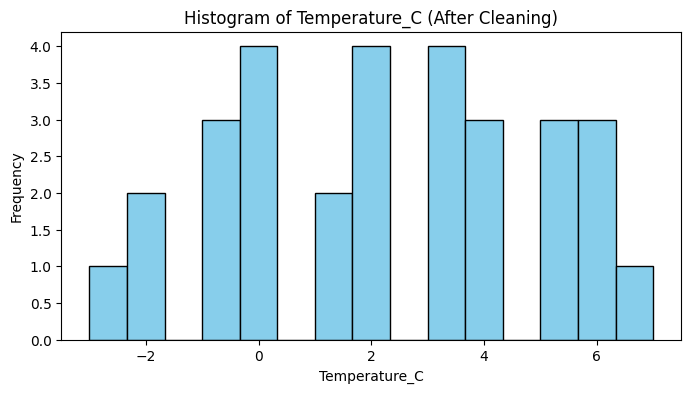

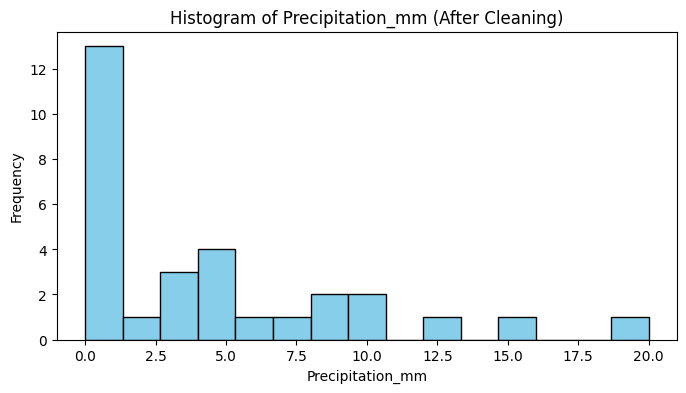

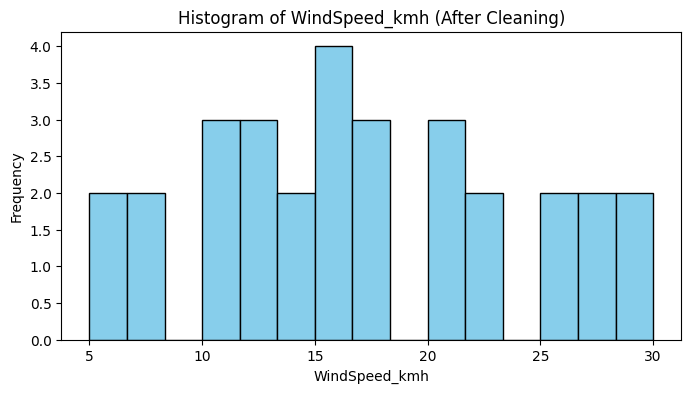

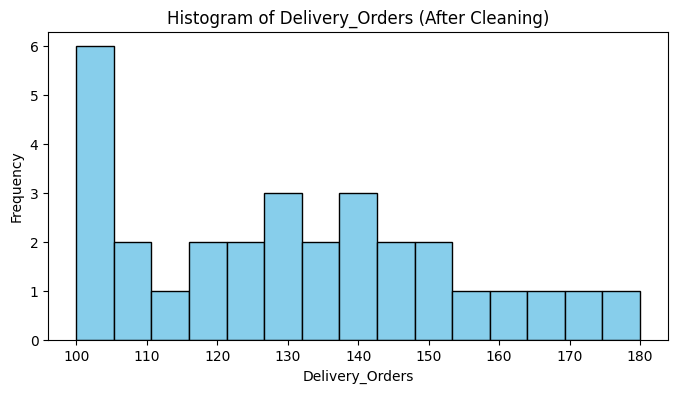

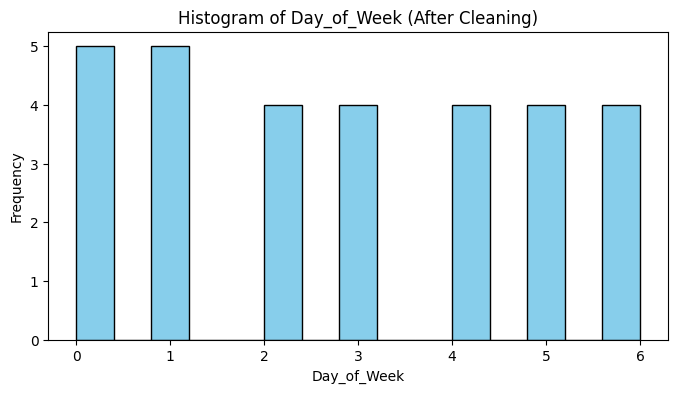

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/food_delivery_weather_data_with_time.csv')

# Identify numerical attributes
numerical_attributes = data.select_dtypes(include=[np.number]).columns.tolist()

# Plot histograms for each numerical attribute
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} (After Cleaning)')
    plt.xlabel(col)  # X-axis: Attribute values
    plt.ylabel('Frequency')  # Y-axis: Frequency of occurrences
    plt.show()


## Box plots help visualize the distribution, quartiles, and outliers in each numerical attribute.

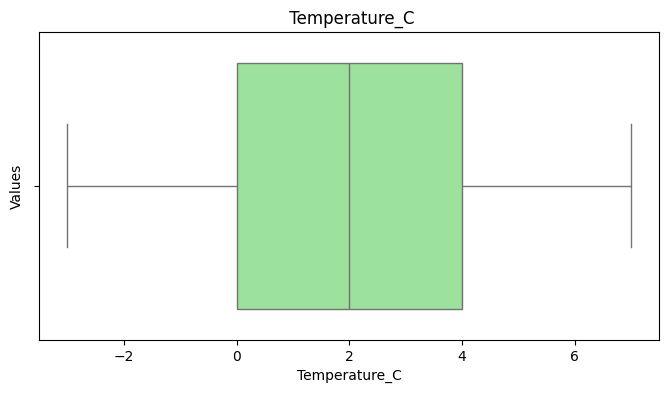

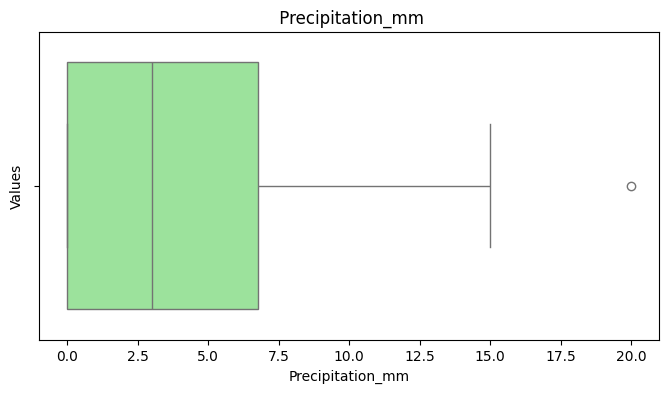

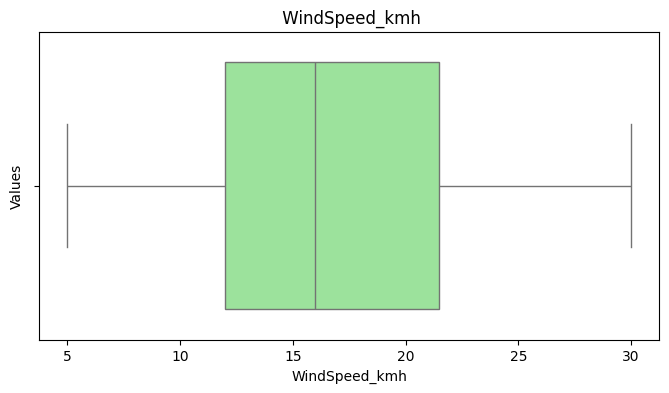

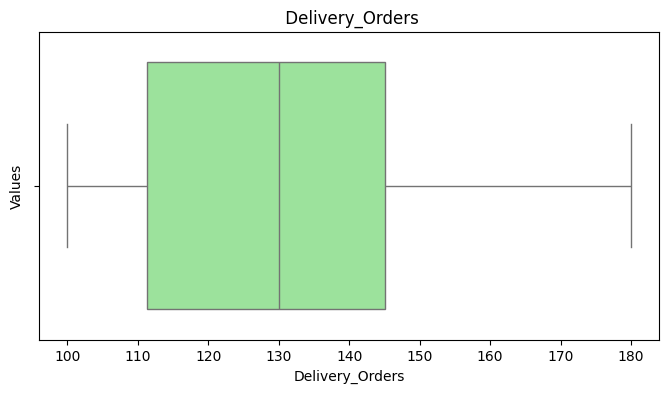

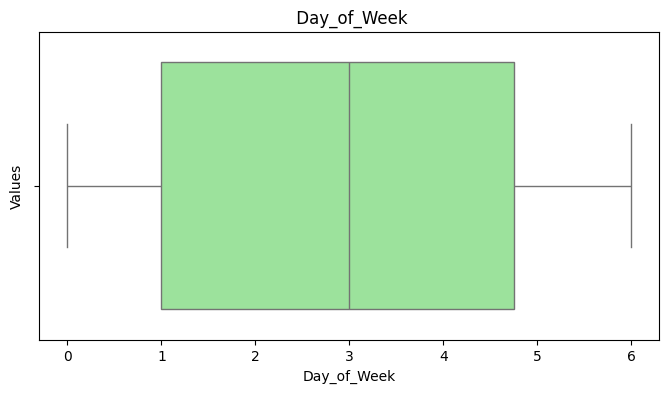

In [5]:
import seaborn as sns

# Box Plot for each numerical attribute
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col].dropna(), color='lightgreen')
    plt.title(f' {col}')
    plt.xlabel(col)  # X-axis: Attribute name
    plt.ylabel('Values')  # Y-axis: Attribute values
    plt.show()


## Bar plots show the frequency of each category in categorical attributes.

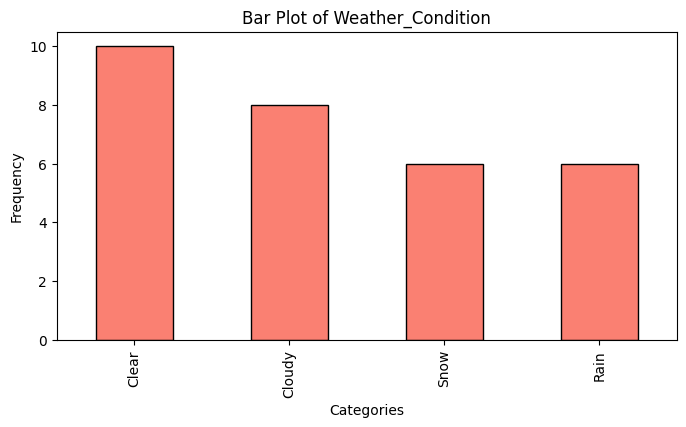

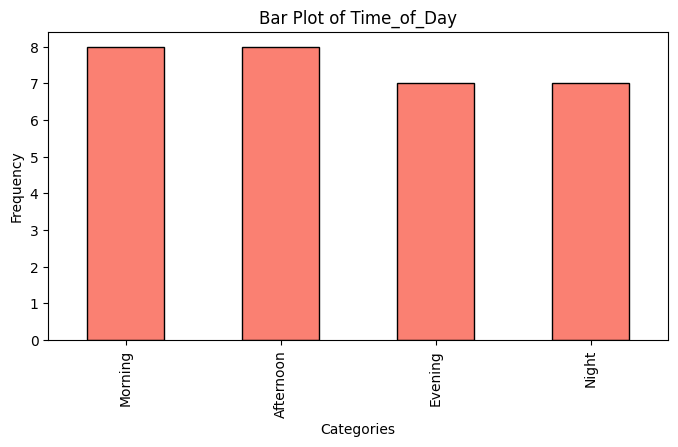

In [6]:
# Load the data
data = pd.read_csv('food_delivery_weather_data_with_time.csv')

# Identify categorical attributes and exclude 'Date'
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()
if 'Date' in categorical_attributes:
    categorical_attributes.remove('Date')  # Remove 'Date' from the list

# Bar Plot for each categorical attribute (excluding Date)
for col in categorical_attributes:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')  # X-axis: Categories in the attribute
    plt.ylabel('Frequency')  # Y-axis: Frequency of each category
    plt.show()


## Scatter plots visualize the relationship between each numerical attribute and the target variable (Delivery_Orders).

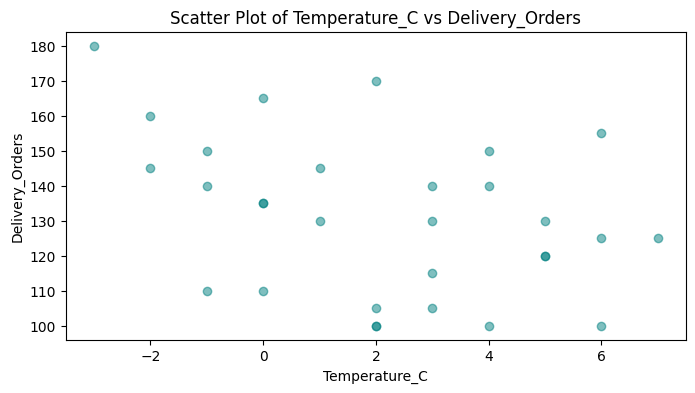

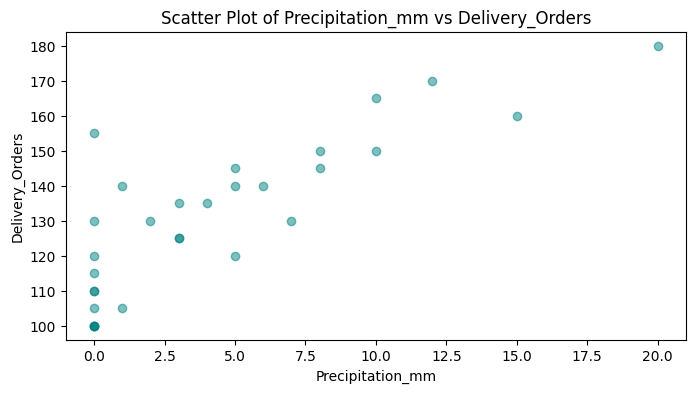

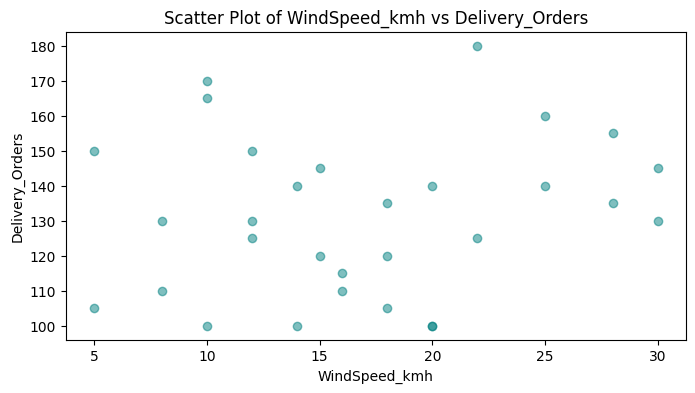

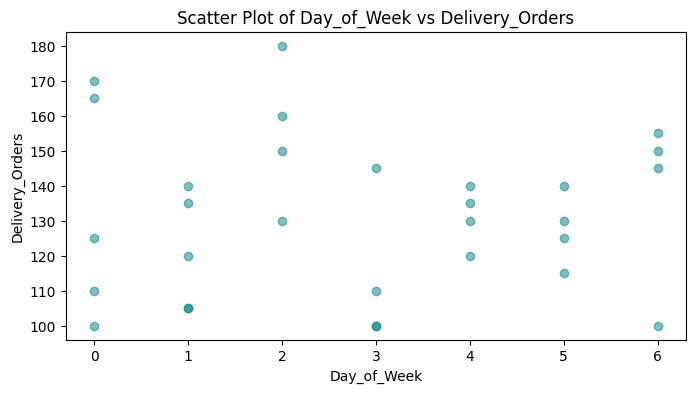

In [7]:
target = 'Delivery_Orders'
numerical_attributes.remove(target)  # Remove target from numerical attributes

# Scatter Plot for each numerical attribute vs. target variable
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[col], data[target], alpha=0.5, color='teal')
    plt.title(f'Scatter Plot of {col} vs {target}')
    plt.xlabel(col)  # X-axis: Attribute values
    plt.ylabel(target)  # Y-axis: Target variable values
    plt.show()


## Identify and Remove Redundant Attributes

Highly Correlated Attribute Pairs: [('Delivery_Orders', 'Precipitation_mm')]

Low Variance Attributes: []

Attributes Dropped: {'Precipitation_mm'}

Remaining Attributes: ['Date', 'Temperature_C', 'WindSpeed_kmh', 'Weather_Condition', 'Delivery_Orders', 'Time_of_Day', 'Day_of_Week']


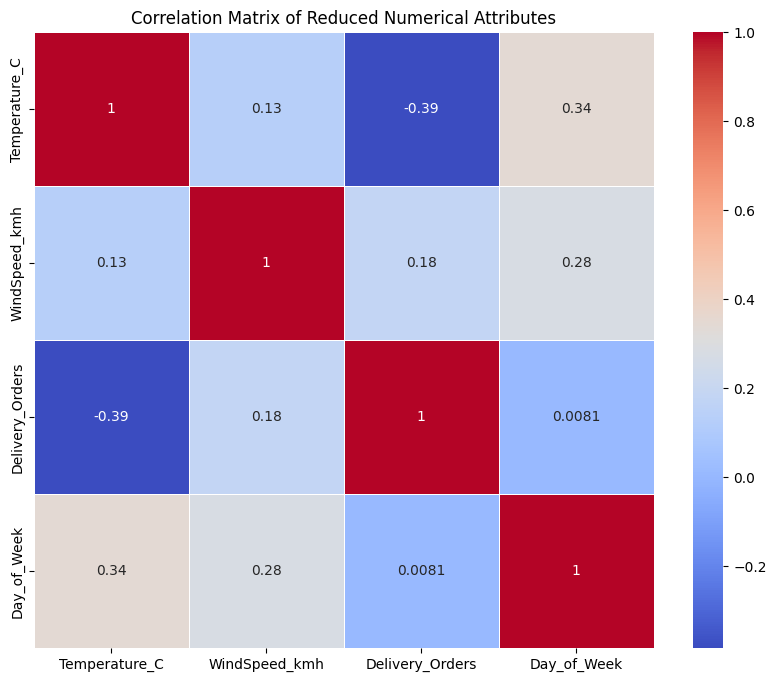

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('food_delivery_weather_data_with_time.csv')

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=[np.number])

# 1. Identify Highly Correlated Attributes
# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_data.corr().abs()  # Take absolute values for easier analysis

# Set a threshold for high correlation (e.g., 0.8)
correlation_threshold = 0.8
high_corr_pairs = []

# Find attribute pairs with correlation higher than the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > correlation_threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_corr_pairs.append((col1, col2))

print("Highly Correlated Attribute Pairs:", high_corr_pairs)

# 2. Remove Constant or Low-Variance Attributes
low_variance_cols = [col for col in numerical_data.columns if numerical_data[col].nunique() <= 1]
print("\nLow Variance Attributes:", low_variance_cols)

# 3. Remove Redundant Attributes
# Drop the identified redundant attributes (keeping one of each high-correlation pair and removing low-variance columns)
attributes_to_drop = set([pair[1] for pair in high_corr_pairs] + low_variance_cols)
data_reduced = data.drop(columns=attributes_to_drop)

print("\nAttributes Dropped:", attributes_to_drop)
print("\nRemaining Attributes:", data_reduced.columns.tolist())

# Show correlation heatmap of remaining numerical attributes for verification
plt.figure(figsize=(10, 8))
sns.heatmap(data_reduced.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Reduced Numerical Attributes')
plt.show()


## Again Data Cleaning

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('food_delivery_weather_data_with_time.csv')

# Step 1: Handling Missing Values
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Method 1: Drop columns with too many missing values (e.g., > 50% missing)
data = data.dropna(thresh=len(data) * 0.5, axis=1)

# Method 2: Fill remaining missing values
# For numerical columns, we can use mean or median imputation
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)  # Using median for numerical columns

# For categorical columns, fill with the mode (most frequent value)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Step 2: Removing Duplicates
# Check for duplicate rows
print("\nDuplicate Rows:", data.duplicated().sum())

# Drop duplicates
data = data.drop_duplicates()

# Step 3: Handling Outliers
# Using the Interquartile Range (IQR) method to identify and cap outliers in numerical columns
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values beyond the lower and upper bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Step 4: Standardizing Categorical Data
# Convert categorical columns to lowercase and strip whitespace for consistency
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

# Step 5: Normalizing or Scaling Numerical Data
# Scale numerical columns using StandardScaler (for normalization)
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Final Cleaned Data
print("\nCleaned Data Preview:")
print(data.head())


Missing Values:
 Date                 0
Temperature_C        0
Precipitation_mm     0
WindSpeed_kmh        0
Weather_Condition    0
Delivery_Orders      0
Time_of_Day          0
Day_of_Week          0
dtype: int64

Duplicate Rows: 0

Cleaned Data Preview:
         Date  Temperature_C  Precipitation_mm  WindSpeed_kmh  \
0  2024-01-01      -0.049523         -0.880161      -0.975176   
1  2024-01-02       1.064735          0.177089      -0.265096   
2  2024-01-03      -1.163780          1.234340      -1.685255   
3  2024-01-04      -0.792361         -0.880161      -1.259208   
4  2024-01-05       0.321897         -0.457261      -0.691144   

  Weather_Condition  Delivery_Orders Time_of_Day  Day_of_Week  
0             clear        -1.415976     morning    -1.392694  
1            cloudy        -0.507328   afternoon    -0.901155  
2              snow         0.855643     evening    -0.409616  
3             clear        -0.961652       night     0.081923  
4            cloudy        -0.053

<ipython-input-9-2a8bbd30bdbf>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Using median for numerical columns
<ipython-input-9-2a8bbd30bdbf>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

## Re-Plotting and Re-Analyzing the Data

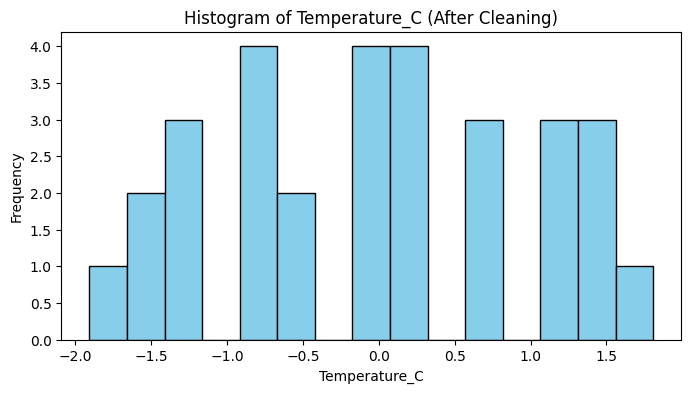

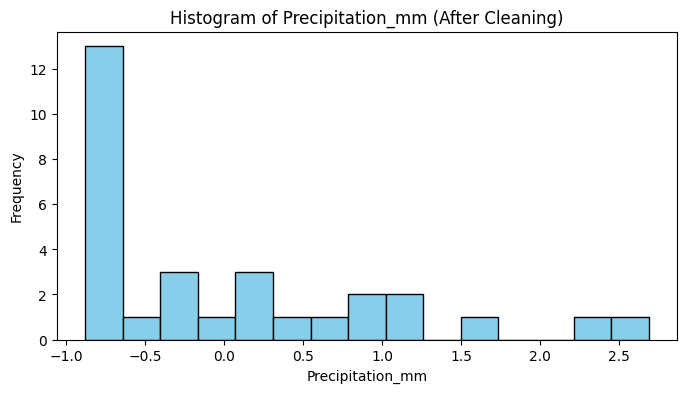

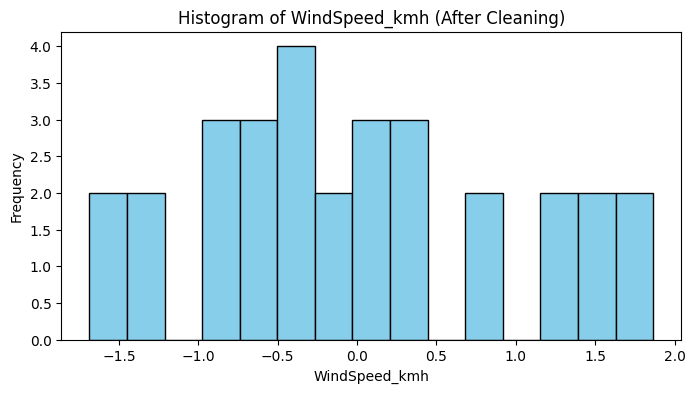

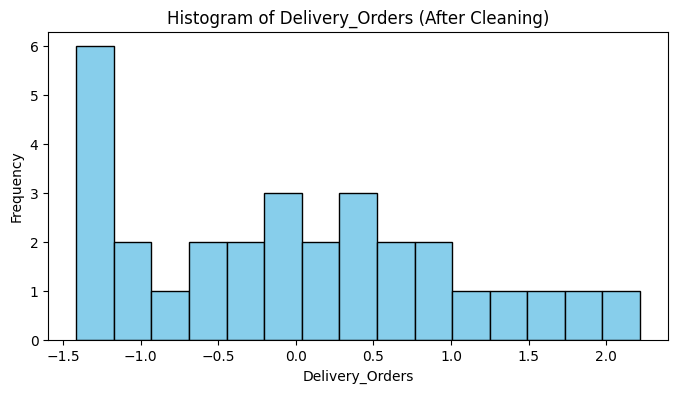

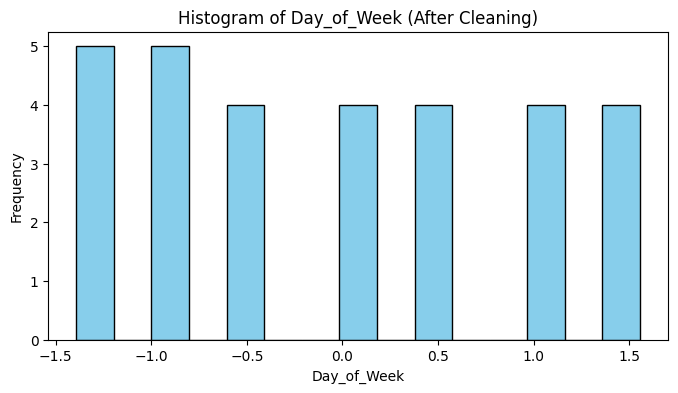

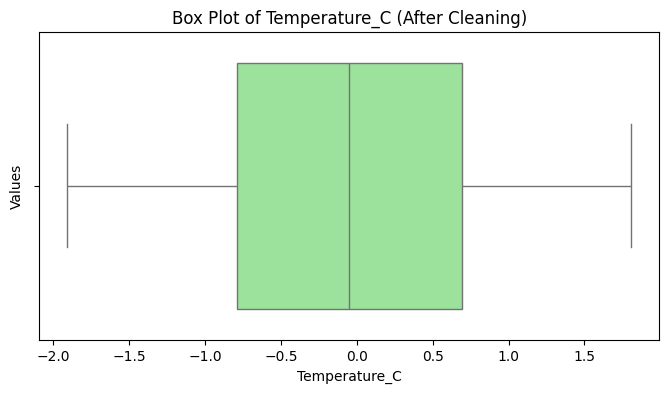

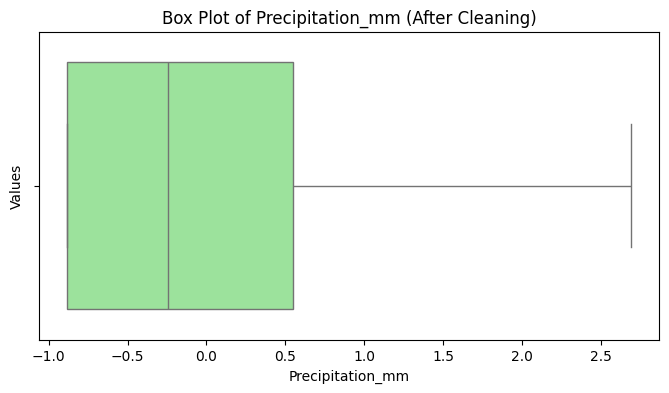

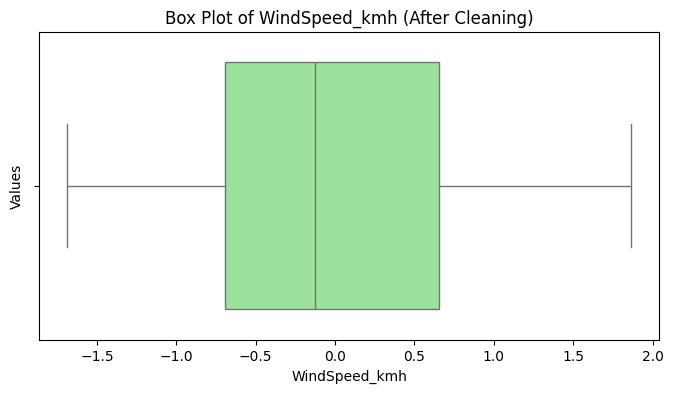

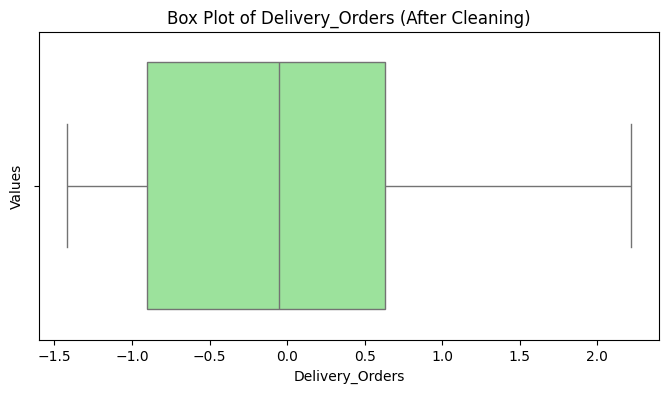

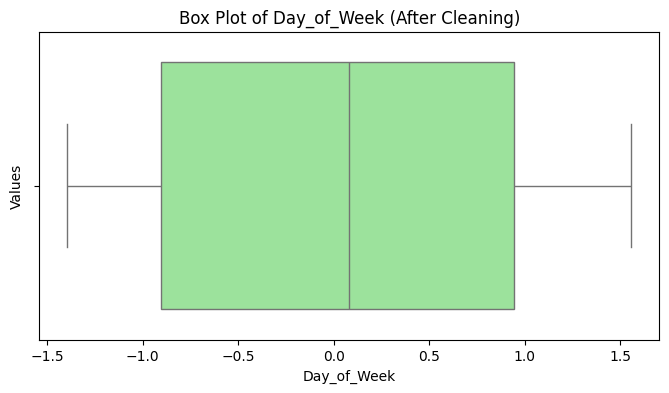

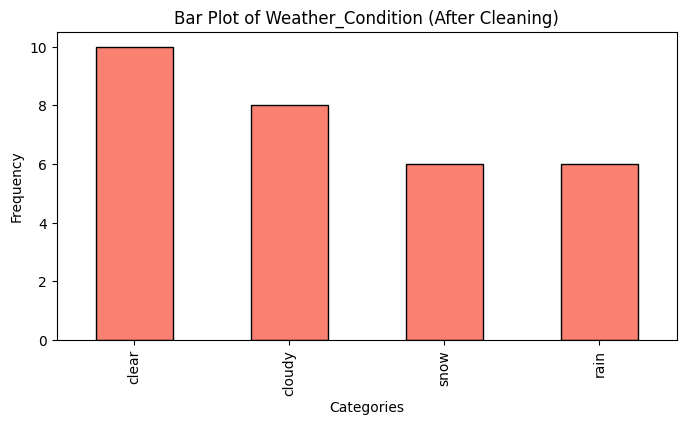

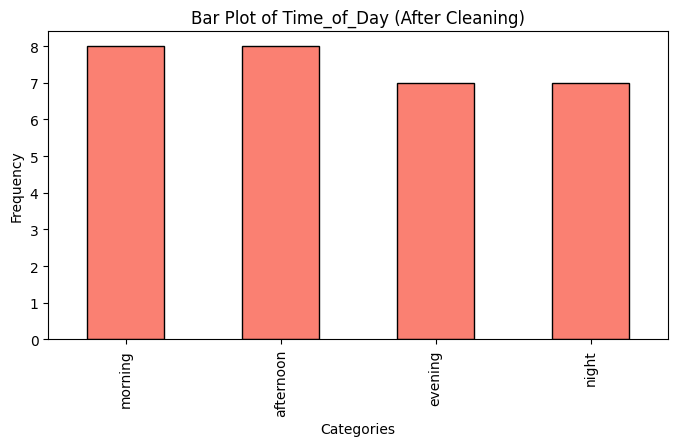

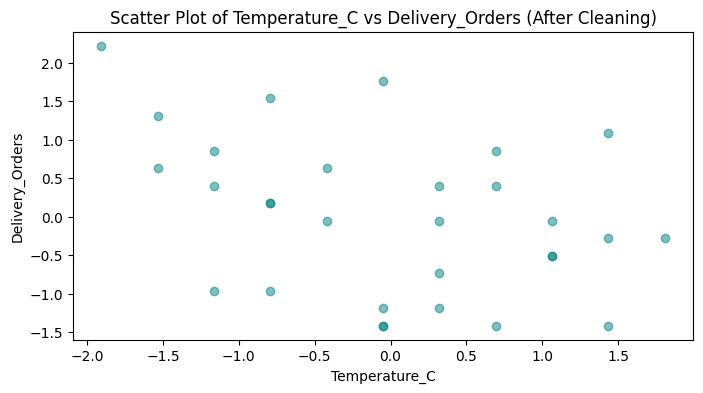

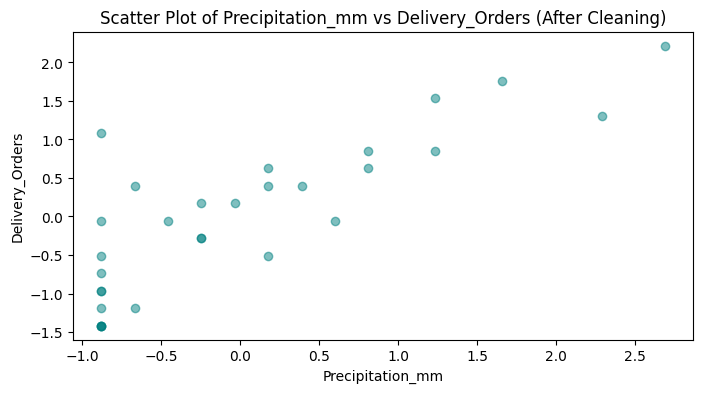

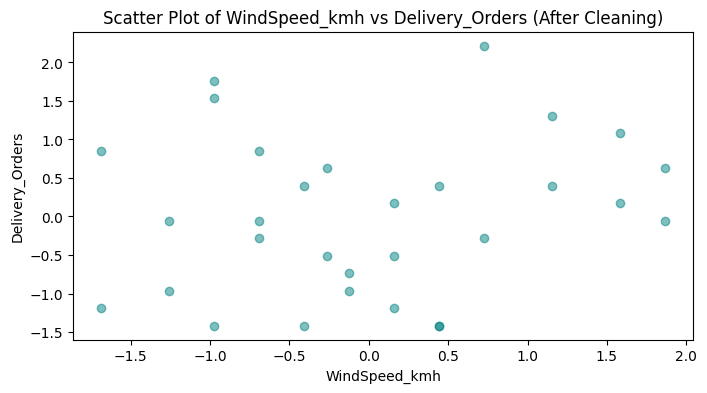

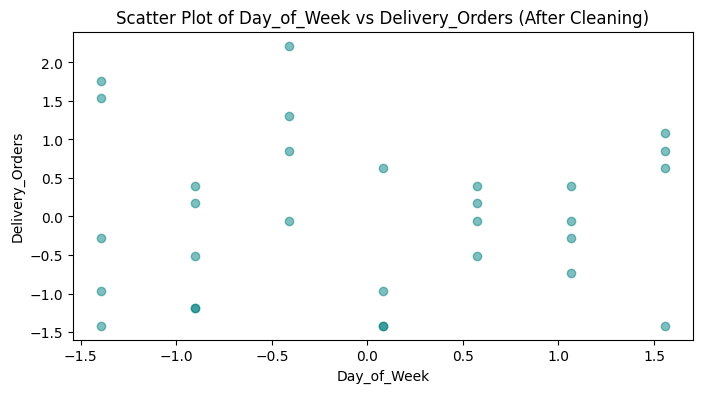

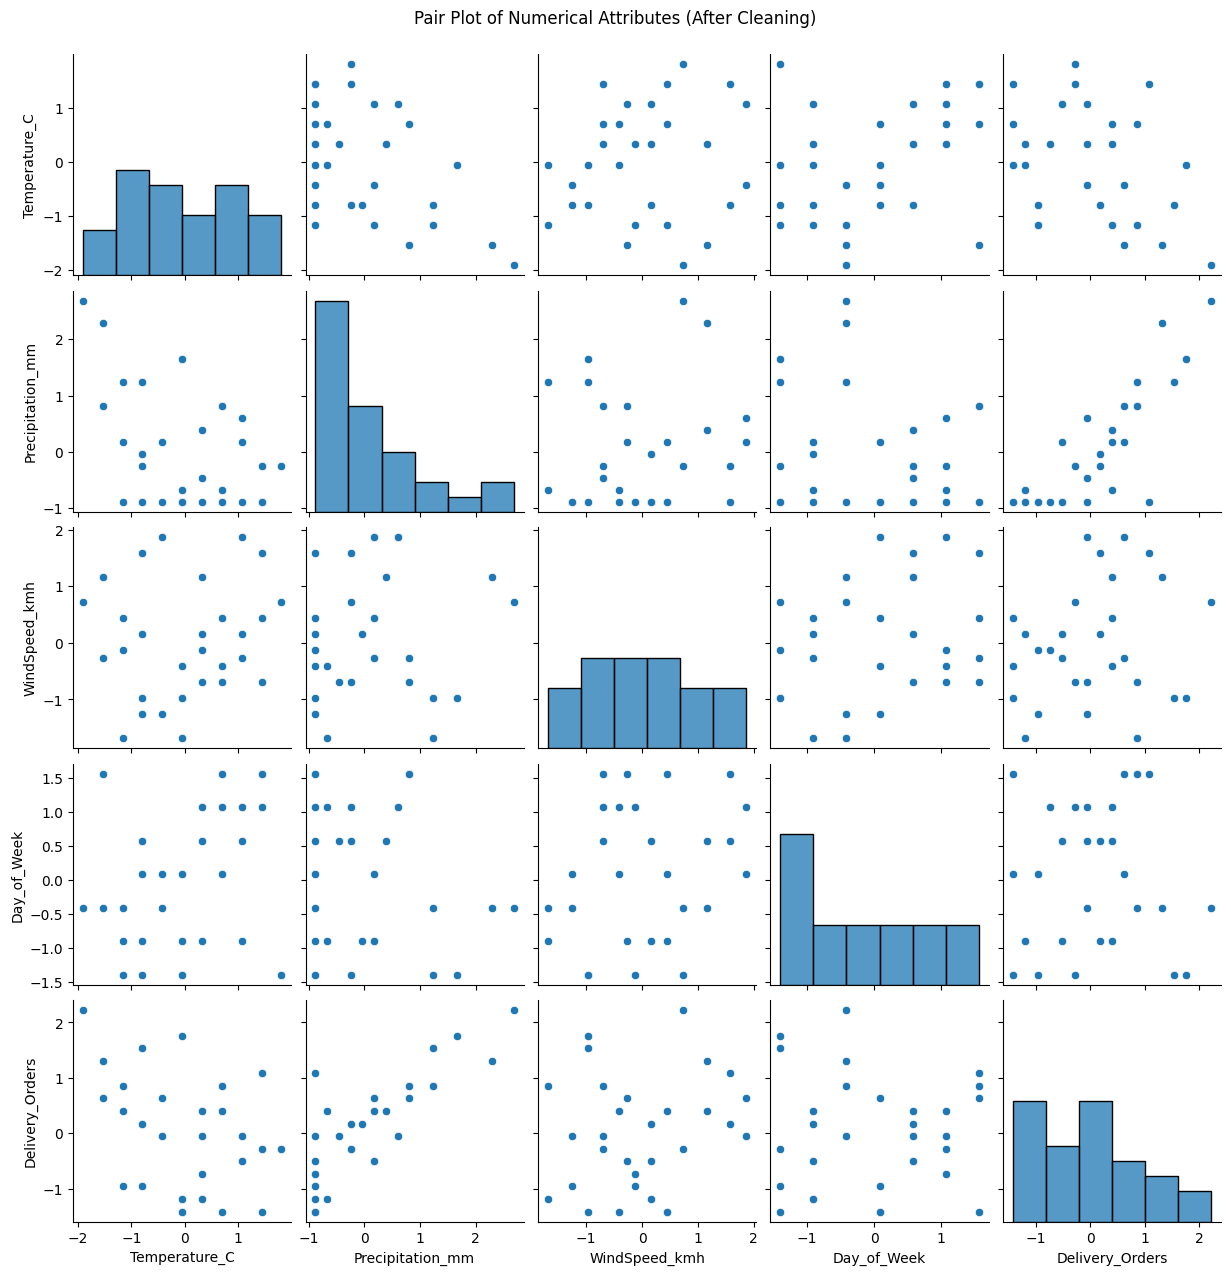

In [10]:
# Identify numerical and categorical attributes
numerical_attributes = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_attributes = data.select_dtypes(include=['object']).columns.tolist()

# Step 1: Histograms for Numerical Attributes
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} (After Cleaning)')
    plt.xlabel(col)  # X-axis: Attribute values
    plt.ylabel('Frequency')  # Y-axis: Frequency of occurrences
    plt.show()

# Step 2: Box Plots for Numerical Attributes
for col in numerical_attributes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {col} (After Cleaning)')
    plt.xlabel(col)  # X-axis: Attribute name
    plt.ylabel('Values')  # Y-axis: Attribute values
    plt.show()

# Step 3: Bar Plots for Categorical Attributes (excluding Date)
if 'Date' in categorical_attributes:
    categorical_attributes.remove('Date')

for col in categorical_attributes:
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
    plt.title(f'Bar Plot of {col} (After Cleaning)')
    plt.xlabel('Categories')  # X-axis: Categories in the attribute
    plt.ylabel('Frequency')  # Y-axis: Frequency of each category
    plt.show()

# Step 4: Scatter Plots for Numerical Attributes vs. Target Variable
target = 'Delivery_Orders'  # Define target variable if applicable
if target in numerical_attributes:
    numerical_attributes.remove(target)  # Remove target for comparison with other attributes
    for col in numerical_attributes:
        plt.figure(figsize=(8, 4))
        plt.scatter(data[col], data[target], alpha=0.5, color='teal')
        plt.title(f'Scatter Plot of {col} vs {target} (After Cleaning)')
        plt.xlabel(col)  # X-axis: Attribute values
        plt.ylabel(target)  # Y-axis: Target variable values
        plt.show()

# Step 5: Pair Plot for Numerical Attributes
# Ensures pair plot only includes available columns after cleaning
available_numerical_attributes = [col for col in numerical_attributes + [target] if col in data.columns]
sns.pairplot(data[available_numerical_attributes].dropna())
plt.suptitle('Pair Plot of Numerical Attributes (After Cleaning)', y=1.02)
plt.show()


## Prepare Train and Test Datasets
To prepare the train and test datasets, I’ll split the cleaned dataset into two parts:

* Training Set: Used to train the machine learning model.
* Testing Set: Used to evaluate the model's performance on unseen data.

**target:** in this case, Delivery_Orders is our Target.

* **train_test_split:** Splits the data into an 80% training set and 20% testing set.
* **random_state=42:** Ensures reproducibility of the split, providing the same split each time the code is run.

In [11]:
from sklearn.model_selection import train_test_split

# show the target variable and features
target = 'Delivery_Orders'  # our target variable
features = data.drop(columns=[target]).columns.tolist()  # All columns except the target

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training Set (X_train):", X_train.shape)
print("Testing Set (X_test):", X_test.shape)
print("Training Set (y_train):", y_train.shape)
print("Testing Set (y_test):", y_test.shape)


Training Set (X_train): (24, 7)
Testing Set (X_test): (6, 7)
Training Set (y_train): (24,)
Testing Set (y_test): (6,)


* We used total 24 rows in X_train, which represents 80% of the data used for training and total 7 columns (or features) in X_train, which includes all the attributes used to predict the target.
*  There are 6 rows in X_test, representing 20% of the data used for testing.

## Random Forest Regressor model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('/content/food_delivery_weather_data_with_time.csv')

# Drop or convert non-numeric columns like 'Date' if not needed
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])  # Drop the Date column

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # Creates binary columns for categories

# Define the target variable and features
target = 'Delivery_Orders'  
features = data.drop(columns=[target]).columns.tolist()

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 14.70
Mean Squared Error (MSE): 414.53
R² Score: 0.21


So here, We used Random Forest method because it is combines multiple decision trees to make a prediction.
 *  R² ranges from 0 to 1:
* 0 means the model explains none of the variance, which is very poor performance.
* 1 means the model explains all the variance, which is ideal.

* **MAE and MSE:** MAE is often smaller than MSE because MSE squares the error values, making them larger. If MAE is significantly lower than MSE, it may suggest a few large errors (outliers) in predictions.
* **R² Score:** A higher R² score (close to 1) indicates that the model explains a larger portion of the variance in the target variable, meaning better performance.

## Training and Testing a KNN Regressor

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('food_delivery_weather_data_with_time.csv')

# Drop or convert non-numeric columns like 'Date' if not needed
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])  # Drop the Date column

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # Creates binary columns for categories

# Define the target variable and features
target = 'Delivery_Orders'  # Adjust if your target variable has a different name
features = data.drop(columns=[target]).columns.tolist()

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor with a chosen number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors for optimal performance

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("K-Nearest Neighbors Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


K-Nearest Neighbors Regressor Performance:
Mean Absolute Error (MAE): 16.83
Mean Squared Error (MSE): 305.50
R² Score: 0.41


## Hyperparameter Tuning for KNN

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define a range of values for n_neighbors
param_grid = {'n_neighbors': range(1, 20)}

# Initialize KNN and GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, scoring='r2', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameter and model performance
print("Best n_neighbors:", grid_search.best_params_)
print("Best R² Score from cross-validation:", grid_search.best_score_)


Best n_neighbors: {'n_neighbors': 5}
Best R² Score from cross-validation: 0.01133842476837792


## Scaling and Normalizing Data

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R² Score:", scores.mean())


Cross-validated R² Score: 0.01133842476837792


## **Feature Engineering:**
* **Day of the Week:** Some days might have different delivery patterns (e.g., weekends may have more orders).
* **Time of Day:**  morning, afternoon, evening, and night patterns.

## **We Make Predictions Based on Different Scenarios:**
* **Weather Scenarios**: sunny, rainy, Windy to see how they impact delivery predictions.
* **Time of Day:** morning, afternoon, evening, night for each weather scenario to understand demand patterns.





/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


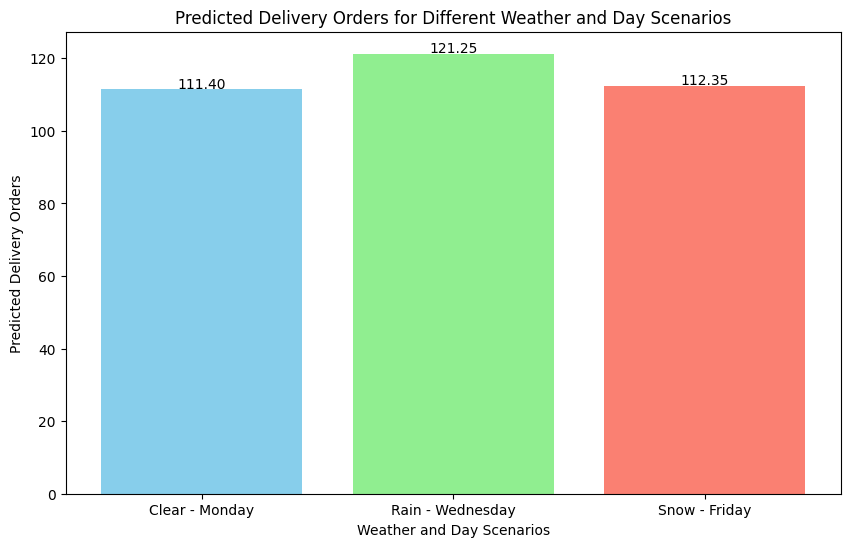

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess your data
data = pd.read_csv('/content/food_delivery_weather_data_with_time.csv')

# Convert Date column to datetime format and extract day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()

# Drop the Date column since it's not needed after extracting the day of the week
data = data.drop(columns=['Date'], errors='ignore')

# Check if the 'Weather' column exists and apply one-hot encoding
if 'Weather' in data.columns:
    # One-hot encode Weather and Day_of_Week columns
    data = pd.get_dummies(data, columns=['Weather', 'Day_of_Week'], drop_first=True)
else:
    # One-hot encode only the Day_of_Week column
    data = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)

# Define the target variable and features
target = 'Delivery_Orders'
X = data.drop(columns=[target])
y = data[target]

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Define multiple scenarios for prediction
scenarios = [
    {'Temperature': 15, 'Precipitation': 0.5, 'WindSpeed': 8, 'Weather_Clear': 1, 'Day_of_Week_Monday': 1},
    {'Temperature': 10, 'Precipitation': 0.2, 'WindSpeed': 10, 'Weather_Rain': 1, 'Day_of_Week_Wednesday': 1},
    {'Temperature': 5, 'Precipitation': 1.0, 'WindSpeed': 15, 'Weather_Snow': 1, 'Day_of_Week_Friday': 1},
]

# Prepare a DataFrame to hold the predictions
predictions = []

# Make predictions for each scenario
for scenario in scenarios:
    # Fill missing features with 0 for consistency
    for col in X.columns:
        if col not in scenario:
            scenario[col] = 0

    # Convert scenario to DataFrame
    scenario_df = pd.DataFrame(scenario, index=[0])
    scenario_df = scenario_df.reindex(columns=X.columns, fill_value=0)

    # Scale and predict
    scenario_scaled = scaler.transform(scenario_df)
    predicted_orders = model.predict(scenario_scaled)[0]

    # Append results
    predictions.append(predicted_orders)

# Plot the results in a bar graph with data labels
scenarios_labels = ["Clear - Monday", "Rain - Wednesday", "Snow - Friday"]
plt.figure(figsize=(10, 6))
bars = plt.bar(scenarios_labels, predictions, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Weather and Day Scenarios")
plt.ylabel("Predicted Delivery Orders")
plt.title("Predicted Delivery Orders for Different Weather and Day Scenarios")

# Add data labels on top of each bar
for bar, prediction in zip(bars, predictions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5, f'{prediction:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


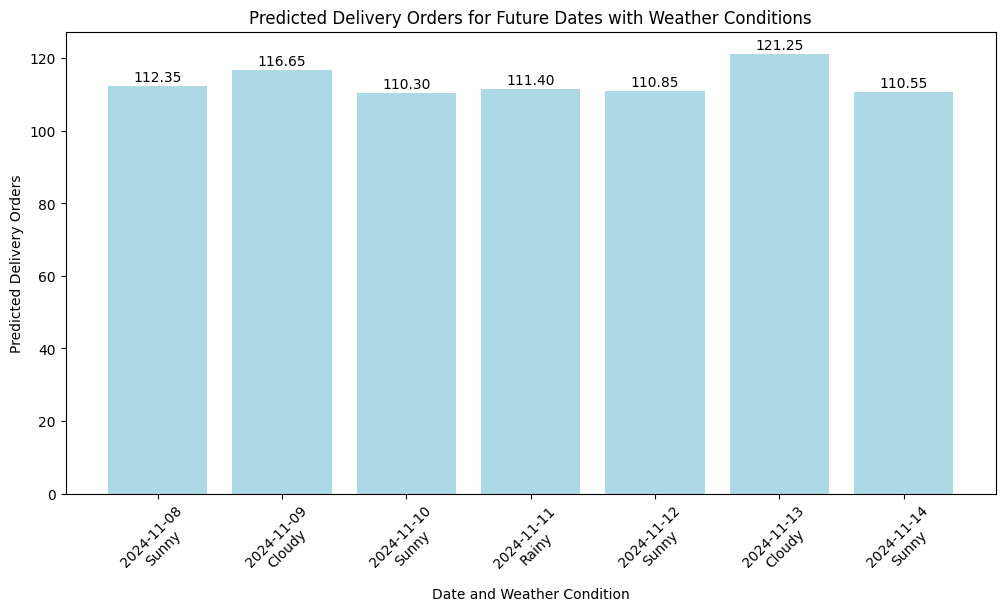

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load and preprocess your data
data = pd.read_csv('/content/food_delivery_weather_data_with_time.csv')

# Convert Date column to datetime format and extract day of the week
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()

# Drop the Date column since it's not needed after extracting the day of the week
data = data.drop(columns=['Date'], errors='ignore')

# Check if the 'Weather' column exists and apply one-hot encoding
if 'Weather' in data.columns:
    # One-hot encode Weather and Day_of_Week columns
    data = pd.get_dummies(data, columns=['Weather', 'Day_of_Week'], drop_first=True)
else:
    # One-hot encode only the Day_of_Week column
    data = pd.get_dummies(data, columns=['Day_of_Week'], drop_first=True)

# Define the target variable and features
target = 'Delivery_Orders'
X = data.drop(columns=[target])
y = data[target]

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Define future dates and scenarios for prediction
start_date = datetime.now()  # Start from today's date
future_scenarios = []

# Create future scenarios for the next 7 days with varying weather conditions
for i in range(7):
    future_date = start_date + timedelta(days=i)
    day_of_week = future_date.strftime('%A')

    # Example weather conditions to vary over the days
    scenario = {
        'Temperature': 10 + i,           # Incremental temperature change
        'Precipitation': 0.1 * i,        # Incremental precipitation
        'WindSpeed': 5 + i,              # Incremental wind speed
        'Weather_Clear': 1 if i % 2 == 0 else 0,  # Clear weather on alternate days
        'Weather_Rain': 1 if i % 3 == 0 else 0,   # Rainy weather every third day
        'Weather_Snow': 1 if i % 4 == 0 else 0    # Snowy weather every fourth day
    }

    # Set the correct day of week encoding
    scenario[f'Day_of_Week_{day_of_week}'] = 1

    # Add scenario to the list
    future_scenarios.append((future_date.strftime('%Y-%m-%d'), scenario))

# Prepare a DataFrame to hold the predictions and weather labels
predictions = []
weather_labels = []  # Store weather conditions for labeling

# Make predictions for each future scenario
for future_date, scenario in future_scenarios:
    # Determine the weather condition label
    if scenario['Weather_Clear'] == 1:
        weather_label = 'Sunny'
    elif scenario['Weather_Rain'] == 1:
        weather_label = 'Rainy'
    elif scenario['Weather_Snow'] == 1:
        weather_label = 'Snowy'
    else:
        weather_label = 'Cloudy'

    # Fill missing features with 0 for consistency
    for col in X.columns:
        if col not in scenario:
            scenario[col] = 0

    # Convert scenario to DataFrame
    scenario_df = pd.DataFrame(scenario, index=[0])
    scenario_df = scenario_df.reindex(columns=X.columns, fill_value=0)

    # Scale and predict
    scenario_scaled = scaler.transform(scenario_df)
    predicted_orders = model.predict(scenario_scaled)[0]

    # Append results with date and weather label
    predictions.append((f"{future_date}\n{weather_label}", predicted_orders))  # Label includes date and weather condition

# Convert predictions to a DataFrame for plotting
predictions_df = pd.DataFrame(predictions, columns=["Date", "Predicted_Delivery_Orders"])

# Plot the results in a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(predictions_df["Date"], predictions_df["Predicted_Delivery_Orders"], color='lightblue')
plt.xlabel("Date and Weather Condition")
plt.ylabel("Predicted Delivery Orders")
plt.title("Predicted Delivery Orders for Future Dates with Weather Conditions")
plt.xticks(rotation=45)

# Add data labels on each bar
for i, (bar, prediction) in enumerate(zip(bars, predictions_df["Predicted_Delivery_Orders"])):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{prediction:.2f}", ha='center', va='bottom')

plt.show()


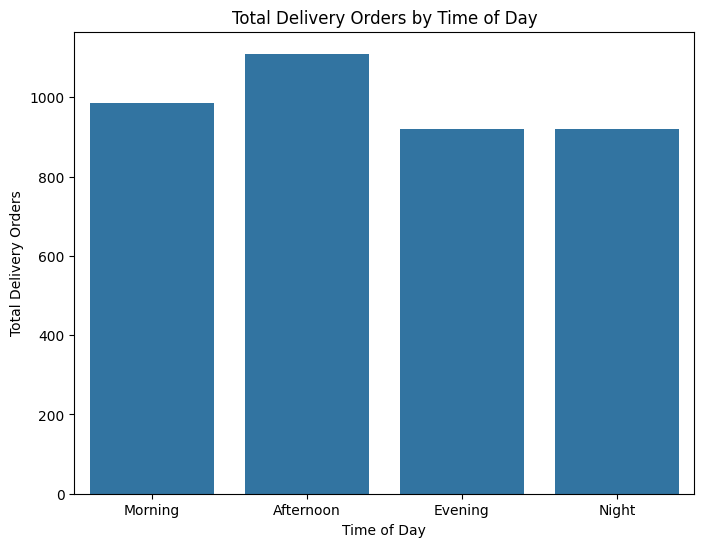

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the dataset
data = pd.read_csv('/content/food_delivery_weather_data_with_time.csv')

# Grouping the data by 'Time_of_Day' and summing the 'Delivery_Orders'
time_of_day_counts = data.groupby('Time_of_Day')['Delivery_Orders'].sum().reset_index()

# Plotting the counts of Delivery Orders for each Time of Day
plt.figure(figsize=(8,6))
sns.barplot(x='Time_of_Day', y='Delivery_Orders', data=time_of_day_counts, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Total Delivery Orders by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Delivery Orders')
plt.show()

## Time-Based Analysis and Seasonality

Add Features for Hourly Patterns and Day of the Week.

Extract Seasonal Features to capture seasonal variations (e.g., summer vs. winter).

Public Holiday Feature to identify days that are public holidays.

In [20]:
import pandas as pd
import datetime
import holidays  # Ensure the 'holidays' library is installed: `pip install holidays`

# Load your dataset
data = pd.read_csv('/content/merged_deliveries_weather_data.csv')  # Replace with the actual path

# Convert the datetime column to datetime format if not already done
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')

# Extract features from the datetime column
data['Hour'] = data['Date_Time'].dt.hour  # Hour of the day
data['Day_of_Week'] = data['Date_Time'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['Date_Time'].dt.month  # Month as an integer (1-12)
data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                     else 'Spring' if x in [3, 4, 5]
                                     else 'Summer' if x in [6, 7, 8]
                                     else 'Fall')

# Determine if each date is a public holiday (Example: Canada holidays)
canada_holidays = holidays.CA(years=data['Date_Time'].dt.year.unique())
data['Is_Holiday'] = data['Date_Time'].dt.date.apply(lambda x: x in canada_holidays)

# Convert the new categorical columns 'Season' and 'Is_Holiday' to numerical encoding or one-hot encoding
data = pd.get_dummies(data, columns=['Season', 'Is_Holiday'], drop_first=True)

# Display the first few rows to verify the new features
data.head()


,Date _Time,Restaurant Name,Food Category,Delivery Fee (CAD),Total Cost (CAD),Delivery Time (Minutes),Customer Rating,Payment Method,Delivery Count,Location,...,Precipitation_mm,Humidity_%,Wind_Speed_kmh,Hour,Day_of_Week,Month,Season_Spring,Season_Summer,Season_Winter,Is_Holiday_True
0,2021-01-01 18:26:00,McDonalds,Mediterranean,4.099880,35.247802,52.985054,4.526698,Debit Card,92,Toronto,...,7.877288,55.617211,13.132378,8,4,1,False,False,True,True
1,2021-01-02 00:55:00,McDonalds,Mediterranean,6.649724,48.037354,44.334002,2.578640,Gift Card,56,Toronto,...,13.024660,94.431702,22.815533,11,5,1,False,False,True,False
2,2021-01-03 17:25:00,Burger King,Vegan,7.745344,52.714623,37.774088,3.746297,Debit Card,141,Toronto,...,2.131861,80.243939,25.419487,18,6,1,False,False,True,False
3,2021-01-04 09:39:00,Burger King,Indian,2.995375,90.761685,57.759836,2.666369,PayPal,132,Toronto,...,13.156906,73.626438,9.540349,20,0,1,False,False,True,False
4,2021-01-05 03:04:00,Taco Bell,Italian,6.796778,49.963075,21.913553,3.594108,Debit Card,133,Toronto,...,19.988275,46.659368,14.273525,21,1,1,False,False,True,False


## Visualization of Time-Based Predictions

In [21]:
import matplotlib.pyplot as plt

# Predicting for each hour of a specific sample day (Day 10 example)
sample_day = data[data['Date_Time'].dt.date == data['Date_Time'].dt.date.unique()[10]]
X_sample_day = sample_day[features]
X_sample_day_scaled = scaler.transform(X_sample_day)
y_sample_day_pred = rf_regressor.predict(X_sample_day_scaled)

# Plotting actual vs. predicted for each hour of the day
plt.figure(figsize=(12, 6))
plt.plot(sample_day['Hour'], sample_day['Delivery Count'], label='Actual')
plt.plot(sample_day['Hour'], y_sample_day_pred, label='Predicted', linestyle='--')
plt.xlabel('Hour of the Day')
plt.ylabel('Delivery Count')
plt.title('Actual vs Predicted Delivery Counts for Sample Day')
plt.legend()
plt.show()


KeyError: "['Temperature_C', 'WindSpeed_kmh', 'Weather_Condition_Cloudy', 'Weather_Condition_Rain', 'Weather_Condition_Snow', 'Time_of_Day_Evening', 'Time_of_Day_Morning', 'Time_of_Day_Night'] not in index"